### Virtual Project1

In [1]:
# CASE SCENARIO:
#The Company operates a fully on-site work model, has balanced
#gender representation on its board, supports the learning and
#growth aspirations of the employees in form of education grants
#where eligible.
#You just resumed your role as a Consulting Data Analyst at PwC
#and Indicino has reached out to your Company to help solve this
#troubling challenge. Your manager has assigned this task to you
#as your first deliverable on the job, to analyze Indicino’s
#provided data, give your insights and recommendation.

In [2]:
#CASE QUESTIONS:
#1. Identify the root cause(s) of attrition in the Company
#2. Predict the job roles that are likely to resign the company
#within the current year and why?
#3. What age band (s) are likely to be retained?
#4. If you were the Group Head of Indicino’s HR, what would
#you do differently?
#5. Does the length of stay with the current manager have
#any impact on the reason(s) you have identified in 1
#above?
#6. Give insights to the performance and rewards culture at
#Indicino
#7. Present your insights and recommendations with
#appropriate charts"""

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [4]:
# Import the data into Jupyter notebook
filepath = r"C:\Users\User\Downloads\Indicino project.xlsx"
df = pd.read_excel(filepath)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Categorize attrition into numeric:
df['EmployeeTurnOver'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [9]:
# Categorizing overtime into numeric for better insight
df['OverTime_check'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,0


### Question 1: Identify the root causes of attrition in Idicino Company

In [10]:
# Highlighting possible root causes of attrition in Indicino Company:
df_features = [
'OverTime_check', 'DistanceFromHome', 
'JobSatisfaction', 'RelationshipSatisfaction', 
'WorkLifeBalance',
'EnvironmentSatisfaction', 'MonthlyIncome',
'YearsAtCompany', 'YearsWithCurrManager'

]

In [11]:
print(df[df_features + ['EmployeeTurnOver']].dtypes)

OverTime_check              int64
DistanceFromHome            int64
JobSatisfaction             int64
RelationshipSatisfaction    int64
WorkLifeBalance             int64
EnvironmentSatisfaction     int64
MonthlyIncome               int64
YearsAtCompany              int64
YearsWithCurrManager        int64
EmployeeTurnOver            int64
dtype: object


In [12]:
# Creating correlation for determining relationships:
df_corr = df[df_features + ['EmployeeTurnOver']]
data_correlation = df_corr.corr()['EmployeeTurnOver'].sort_values(ascending = False)

print(data_correlation)

EmployeeTurnOver            1.000000
OverTime_check              0.246118
DistanceFromHome            0.077924
RelationshipSatisfaction   -0.045872
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
YearsAtCompany             -0.134392
YearsWithCurrManager       -0.156199
MonthlyIncome              -0.159840
Name: EmployeeTurnOver, dtype: float64


In [13]:
def attrition_rate(value):
    absolute_value = abs(value)
    if absolute_value <= 0.05:
        return "Very Low"
    elif absolute_value <= 0.15:
        return "Low"
    elif absolute_value <= 0.30:
        return "Indifferent"
    elif absolute_value <= 0.50:
        return "High"
    else:
        return "Very High"


features = {
    "EmployeeTurnOver": 1.000000,
    "OverTime_check": 0.246118,
    "DistanceFromHome": 0.077924,
    "RelationshipSatisfaction": -0.045872,
    "WorkLifeBalance": -0.063939,
    "EnvironmentSatisfaction": -0.103369,
    "JobSatisfaction": -0.103481,
    "YearsAtCompany": -0.134392,
    "YearsWithCurrManager": -0.156199,
    "MonthlyIncome": -0.159840
}

attrition_values = {feature: attrition_rate(value) for feature, value in features.items()}

for feature, category in attrition_values.items():
    print(f"{feature}: {category}")

EmployeeTurnOver: Very High
OverTime_check: Indifferent
DistanceFromHome: Low
RelationshipSatisfaction: Very Low
WorkLifeBalance: Low
EnvironmentSatisfaction: Low
JobSatisfaction: Low
YearsAtCompany: Low
YearsWithCurrManager: Indifferent
MonthlyIncome: Indifferent


In [14]:
correlations = pd.DataFrame(list(attrition_values.items()), columns=["Features", "Attrition_Category"])

print(correlations)

                   Features Attrition_Category
0          EmployeeTurnOver          Very High
1            OverTime_check        Indifferent
2          DistanceFromHome                Low
3  RelationshipSatisfaction           Very Low
4           WorkLifeBalance                Low
5   EnvironmentSatisfaction                Low
6           JobSatisfaction                Low
7            YearsAtCompany                Low
8      YearsWithCurrManager        Indifferent
9             MonthlyIncome        Indifferent


In [15]:
data_correlation = pd.Series({
    "EmployeeTurnOver": 1.000000,
    "OverTime_check": 0.246118,
    "DistanceFromHome": 0.077924,
    "RelationshipSatisfaction": -0.045872,
    "WorkLifeBalance": -0.063939,
    "EnvironmentSatisfaction": -0.103369,
    "JobSatisfaction": -0.103481,
    "YearsAtCompany": -0.134392,
    "YearsWithCurrManager": -0.156199,
    "MonthlyIncome": -0.159840
})

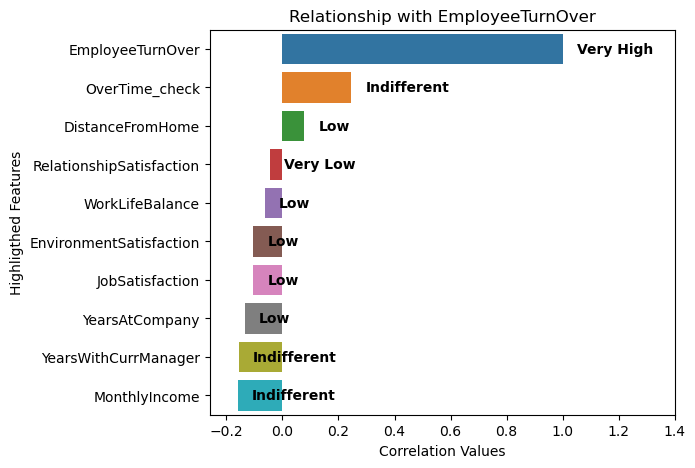

In [16]:
# Using chart to visualize the causes of attrition and correlation:

plt.figure(figsize=(6, 5))
sns.barplot(x=data_correlation.values, y=data_correlation.index, palette='tab10')

plt.xlim(data_correlation.min()- 0.10, data_correlation.max() + 0.4)

for x, i in attrition_values.items():
    y_loc = data_correlation.index.get_loc(x)
    plt.text(data_correlation[x] + 0.05, y_loc, i, va='center', fontweight='bold', color='black')

plt.title('Relationship with EmployeeTurnOver')
plt.xlabel('Correlation Values')
plt.ylabel('Highligthed Features')
plt.show()

### Question 2: Predict the job roles that are likely to resign the company within the current year and why?


In [17]:
if 'JobRole' in df.columns:
    attrition_by_department = df.groupby('JobRole')['EmployeeTurnOver'].mean().sort_values(ascending=False)
    print("Attrition Rate department (%):\n")
    print((attrition_by_department * 100).round(2))   

Attrition Rate department (%):

Department
Sales                     20.63
Human Resources           19.05
Research & Development    13.84
Name: EmployeeTurnOver, dtype: float64


In [18]:
df['Sales'] = df['Department'] == 'Sales'
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check,Sales
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,1,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,False


In [20]:
features = [
    'OverTime', 
    'JobSatisfaction', 
    'WorkLifeBalance', 
    'MonthlyIncome', 
    'YearsWithCurrManager']

def percentage_overtime(series):
    if series.dtype == 'object':
        return (series == 'Yes').mean() * 100
    else:
        return series.mean() * 100
    
comparison = df.groupby('ISales')[features].agg({
    'OverTime': percentage_overtime,
    'JobSatisfaction': 'mean',
    'WorkLifeBalance': 'mean',
    'MonthlyIncome': 'mean',
    'YearsWithCurrManager': 'mean'
}).rename(index={True: 'Sales', False: 'Other Roles'})

comparison.index = ['Other Roles', 'Sales']
comparison.columns = ['% OverTime', 'Job Satisfaction', 'Work-Life Balance', 
                      'Monthly Income ($)', 'Years w/ Manager']

print('\nComparison Between Sales and Others:\n')
print(comparison.round(2))


Comparison Between Sales and Others:

             % OverTime  Job Satisfaction  Work-Life Balance  \
Other Roles       28.12              2.72               2.74   
Sales             28.70              2.75               2.82   

             Monthly Income ($)  Years w/ Manager  
Other Roles             6304.22              4.06  
Sales                   6959.17              4.27  


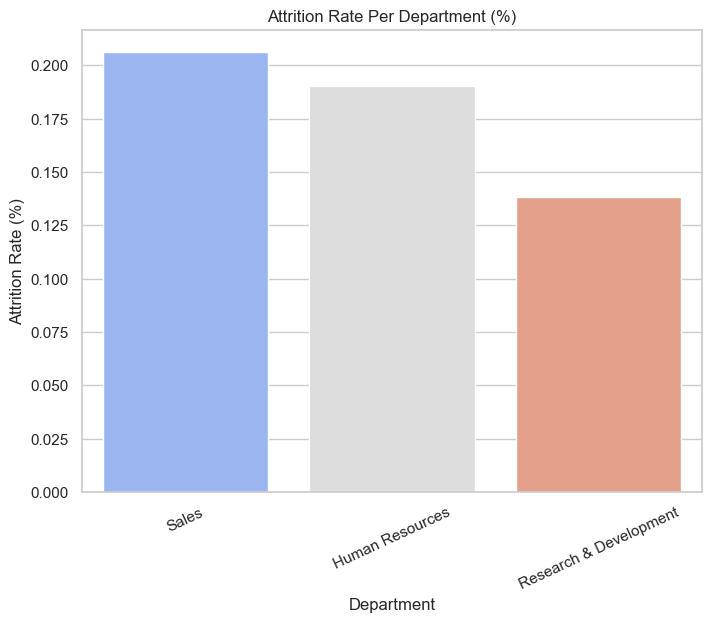

In [206]:
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_by_department.index, y=attrition_by_department.values, palette='coolwarm')
plt.title('Attrition Rate Per Department (%)')
plt.xticks(rotation=25)
plt.ylabel('Attrition Rate (%)')
plt.show()

In [22]:
# Creating model for prediction:
model = RandomForestClassifier()

In [23]:
X = df[['OverTime_check','MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany']]
y = df['EmployeeTurnOver'] 

In [24]:
print(X.shape)
print(y.shape)

(1470, 5)
(1470,)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape) 

(1176, 5) (1176,)
(294, 5) (294,)


In [27]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
print(x_test.shape)

(294, 5)


In [29]:
y_pred = model.predict_proba(x_test)[:, 1]

In [30]:
y_pred

array([0.04, 0.2 , 0.41, 0.17, 0.  , 0.65, 0.  , 0.02, 0.  , 0.03, 0.55,
       0.03, 0.04, 0.84, 0.46, 0.04, 0.34, 0.04, 0.2 , 0.09, 0.03, 0.  ,
       0.1 , 0.1 , 0.02, 0.59, 0.13, 0.01, 0.  , 0.  , 0.01, 0.  , 0.02,
       0.01, 0.32, 0.17, 0.01, 0.57, 0.39, 0.17, 0.02, 0.  , 0.14, 0.03,
       0.61, 0.  , 0.05, 0.13, 0.28, 0.76, 0.02, 0.06, 0.16, 0.  , 0.  ,
       0.04, 0.48, 0.  , 0.  , 0.42, 0.02, 0.9 , 0.03, 0.02, 0.27, 0.43,
       0.15, 0.08, 0.02, 0.01, 0.03, 0.01, 0.22, 0.  , 0.02, 0.09, 0.  ,
       0.05, 0.23, 0.13, 0.  , 0.14, 0.06, 0.05, 0.26, 0.  , 0.49, 0.19,
       0.2 , 0.  , 0.  , 0.17, 0.16, 0.26, 0.02, 0.02, 0.  , 0.04, 0.33,
       0.02, 0.35, 0.07, 0.05, 0.04, 0.  , 0.06, 0.09, 0.13, 0.04, 0.17,
       0.17, 0.03, 0.02, 0.29, 0.49, 0.  , 0.25, 0.62, 0.01, 0.  , 0.39,
       0.06, 0.02, 0.18, 0.04, 0.67, 0.03, 0.  , 0.  , 0.01, 0.02, 0.48,
       0.24, 0.  , 0.  , 0.  , 0.44, 0.27, 0.33, 0.08, 0.24, 0.39, 0.03,
       0.  , 0.08, 0.01, 0.16, 0.41, 0.89, 0.13, 0.

In [164]:
y_pred = np.array([0.04, 0.2 , 0.41, 0.17, 0.  , 0.65, 0.  , 0.02, 0.  , 0.03, 0.55,
       0.03, 0.04, 0.84, 0.46, 0.04, 0.34, 0.04, 0.2 , 0.09, 0.03, 0.  ,
       0.1 , 0.1 , 0.02, 0.59, 0.13, 0.01, 0.  , 0.  , 0.01, 0.  , 0.02,
       0.01, 0.32, 0.17, 0.01, 0.57, 0.39, 0.17, 0.02, 0.  , 0.14, 0.03,
       0.61, 0.  , 0.05, 0.13, 0.28, 0.76, 0.02, 0.06, 0.16, 0.  , 0.  ,
       0.04, 0.48, 0.  , 0.  , 0.42, 0.02, 0.9 , 0.03, 0.02, 0.27, 0.43,
       0.15, 0.08, 0.02, 0.01, 0.03, 0.01, 0.22, 0.  , 0.02, 0.09, 0.  ,
       0.05, 0.23, 0.13, 0.  , 0.14, 0.06, 0.05, 0.26, 0.  , 0.49, 0.19,
       0.2 , 0.  , 0.  , 0.17, 0.16, 0.26, 0.02, 0.02, 0.  , 0.04, 0.33,
       0.02, 0.35, 0.07, 0.05, 0.04, 0.  , 0.06, 0.09, 0.13, 0.04, 0.17,
       0.17, 0.03, 0.02, 0.29, 0.49, 0.  , 0.25, 0.62, 0.01, 0.  , 0.39,
       0.06, 0.02, 0.18, 0.04, 0.67, 0.03, 0.  , 0.  , 0.01, 0.02, 0.48,
       0.24, 0.  , 0.  , 0.  , 0.44, 0.27, 0.33, 0.08, 0.24, 0.39, 0.03,
       0.  , 0.08, 0.01, 0.16, 0.41, 0.89, 0.13, 0.  , 0.05, 0.18, 0.62,
       0.05, 0.13, 0.05, 0.  , 0.02, 0.03, 0.  , 0.01, 0.04, 0.38, 0.02,
       0.23, 0.02, 0.14, 0.13, 0.03, 0.06, 0.01, 0.59, 0.  , 0.07, 0.83,
       0.  , 0.24, 0.08, 0.09, 0.09, 0.01, 0.24, 0.04, 0.06, 0.54, 0.  ,
       0.5 , 0.01, 0.  , 0.  , 0.13, 0.31, 0.06, 0.23, 0.23, 0.36, 0.09,
       0.  , 0.1 , 0.  , 0.  , 0.09, 0.31, 0.  , 0.03, 0.23, 0.  , 0.  ,
       0.22, 0.17, 0.22, 0.01, 0.24, 0.32, 0.03, 0.01, 0.  , 0.01, 0.14,
       0.24, 0.51, 0.05, 0.02, 0.  , 0.68, 0.16, 0.01, 0.04, 0.11, 0.15,
       0.25, 0.34, 0.27, 0.03, 0.  , 0.01, 0.39, 0.02, 0.28, 0.09, 0.  ,
       0.21, 0.11, 0.08, 0.05, 0.  , 0.07, 0.01, 0.07, 0.04, 0.01, 0.29,
       0.  , 0.7 , 0.  , 0.03, 0.01, 0.37, 0.  , 0.08, 0.35, 0.38, 0.13,
       0.03, 0.11, 0.05, 0.04, 0.  , 0.36, 0.02, 0.02, 0.08, 0.14, 0.01,
       0.  , 0.19, 0.09, 0.13, 0.01, 0.02, 0.69, 0.2 , 0.21, 0.22, 0.18,
       0.12, 0.15, 0.42, 0.  , 0.09, 0.2 , 0.03, 0.08

])
df.loc[x_test.index, 'AttritionProbability'] = y_pred

# Group by department and calculate mean attrition probability
dept_risk = df.groupby('Department')['AttritionProbability'].mean().sort_values(ascending=False)

print("Departments by Attrition Risk (Highest to Lowest):")
print(dept_risk.round(2))

Departments by Attrition Risk (Highest to Lowest):
Department
Human Resources           0.20
Research & Development    0.15
Sales                     0.14
Name: AttritionProbability, dtype: float64


In [166]:
print(df.loc[x_test.index, ['Department', 'AttritionProbability']].head(4))

                  Department  AttritionProbability
1041                   Sales                  0.04
184   Research & Development                  0.20
1222         Human Resources                  0.41
67    Research & Development                  0.17


In [66]:
print(len(y_pred))

print(df['AttritionProbability'].notnull().sum())

294
294


In [172]:
df = df.dropna(subset=['AttritionProbability']).reset_index(drop=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,age_band_retention,AttritionProbability,Flag_HighRiskRole
0,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,1,3,10,9,8,8,0,20-30,0.62,True
1,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,6,3,0,0,0,0,0,20-30,0.17,True
2,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,2,2,2,2,2,1,0,40-50,0.01,True
3,33,No,Travel_Rarely,924,Research & Development,2,3,Medical,1,39,...,3,3,1,1,0,0,0,30-40,0.03,True
4,30,No,Travel_Rarely,125,Research & Development,9,2,Medical,1,41,...,5,3,10,0,1,8,0,20-30,0.02,True


In [72]:
assert len(y_pred) == len(x_test)

print(df[['Department', 'AttritionProbability']].head())

               Department  AttritionProbability
0  Research & Development                  0.62
1  Research & Development                  0.17
2                   Sales                  0.01
3  Research & Development                  0.03
4  Research & Development                  0.02


In [77]:
print("Your array stats:")
print(f"Max: {y_pred.max():.2f}, Mean: {y_pred.mean():.2f}")

Your array stats:
Max: 0.90, Mean: 0.15


In [78]:
high_risk_depts = df.groupby('Department')['AttritionProbability'].max().sort_values(ascending=False)
print("Departments with Highest-Risk Employees:\n", high_risk_depts)

Departments with Highest-Risk Employees:
 Department
Research & Development    0.90
Sales                     0.83
Human Resources           0.67
Name: AttritionProbability, dtype: float64


In [93]:
limit = 0.50
high_risk_counts = df[df['AttritionProbability'] > threshold].groupby('Department').size()
print("Departments with Most High-Risk Employees:\n", high_risk_counts)

Departments with Most High-Risk Employees:
 Department
Human Resources            1
Research & Development    12
Sales                      6
dtype: int64


In [84]:
dept_risk = df.groupby('Department')['AttritionProbability'].agg(['mean', 'max'])
dept_risk['weighted_score'] = 0.7 * dept_risk['max'] + 0.3 * dept_risk['mean'] 
print(dept_risk.sort_values('weighted_score', ascending=False))

                            mean   max  weighted_score
Department                                            
Research & Development  0.147296  0.90        0.674189
Sales                   0.138706  0.83        0.622612
Human Resources         0.200000  0.67        0.529000


In [91]:
print(df.nlargest(10, 'AttritionProbability')[['Department', 'AttritionProbability']])

                 Department  AttritionProbability
152  Research & Development                  0.90
20   Research & Development                  0.89
71   Research & Development                  0.84
222                   Sales                  0.83
176  Research & Development                  0.76
256  Research & Development                  0.70
69                    Sales                  0.69
175  Research & Development                  0.68
84          Human Resources                  0.67
103                   Sales                  0.65


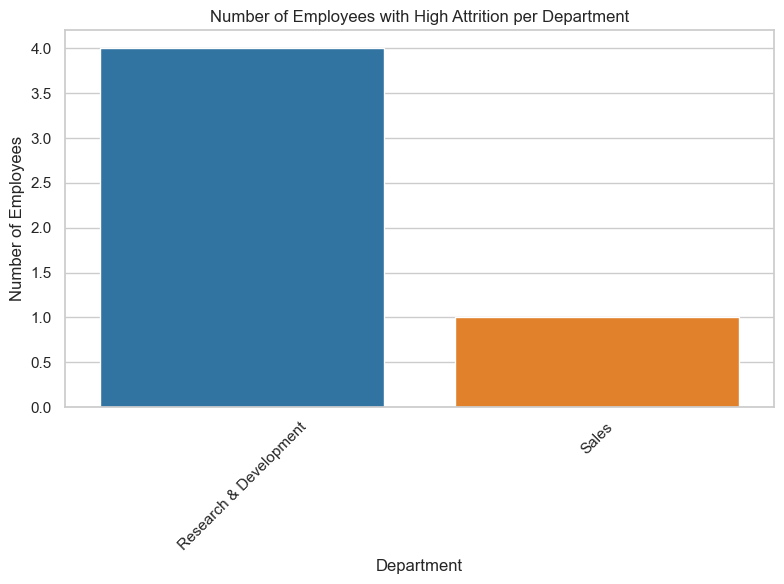

In [111]:
top_attrition_counts = top_attrition['Department'].value_counts().reset_index()
top_attrition_counts.columns = ['Department', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(data=top_attrition_counts, x='Department', y='Count', palette='tab10')

plt.title('Number of Employees with High Attrition per Department')
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
# Identify the reason for possible attrition by overall department average:

risk_attrition_dept = attrition_by_department.head(3).index.tolist()
print("High-Attrition Roles:", risk_attrition_dept)

measures = {
    'MonthlyIncome': 'Average Salary',
    'JobSatisfaction': 'Job Satisfaction (1-5)',
    'OverTime': '% Working Overtime',
    'WorkLifeBalance': 'Work-Life Balance (1-5)',
    'YearsWithCurrManager': 'Avg. Years with Manager'
}

for x in risk_attrition_dept:
    sales_dt = df[df['Department'] == x]
    other_dt = df[df['Department'] != x]
    
    print(f"\n Analysis for {x}")
    
    for col, label in measures.items():
        if col == 'OverTime':
            sales_val = (sales_dt[col] == 'Yes').mean() * 100
            other_val = (other_dt[col] == 'Yes').mean() * 100
            print(f"{label}: {sales_val:.2f}% (vs. Others: {other_val:.2f}%)")
        else:
            sales_val = sales_dt[col].mean()
            other_val = other_dt[col].mean()
            print(f"{label}: {sales_val:.2f} (vs. Others: {other_val:.2f})")

High-Attrition Roles: ['Sales', 'Human Resources', 'Research & Development']

 Analysis for Sales
Average Salary: 7251.11 (vs. Others: 6876.16)
Job Satisfaction (1-5): 2.71 (vs. Others: 2.70)
% Working Overtime: 27.06% (vs. Others: 25.84%)
Work-Life Balance (1-5): 2.79 (vs. Others: 2.80)
Avg. Years with Manager: 4.45 (vs. Others: 4.53)

 Analysis for Human Resources
Average Salary: 8155.62 (vs. Others: 6930.38)
Job Satisfaction (1-5): 2.62 (vs. Others: 2.70)
% Working Overtime: 15.38% (vs. Others: 26.69%)
Work-Life Balance (1-5): 3.08 (vs. Others: 2.79)
Avg. Years with Manager: 4.46 (vs. Others: 4.51)

 Analysis for Research & Development
Average Salary: 6791.30 (vs. Others: 7371.09)
Job Satisfaction (1-5): 2.70 (vs. Others: 2.69)
% Working Overtime: 26.53% (vs. Others: 25.51%)
Work-Life Balance (1-5): 2.79 (vs. Others: 2.83)
Avg. Years with Manager: 4.54 (vs. Others: 4.45)


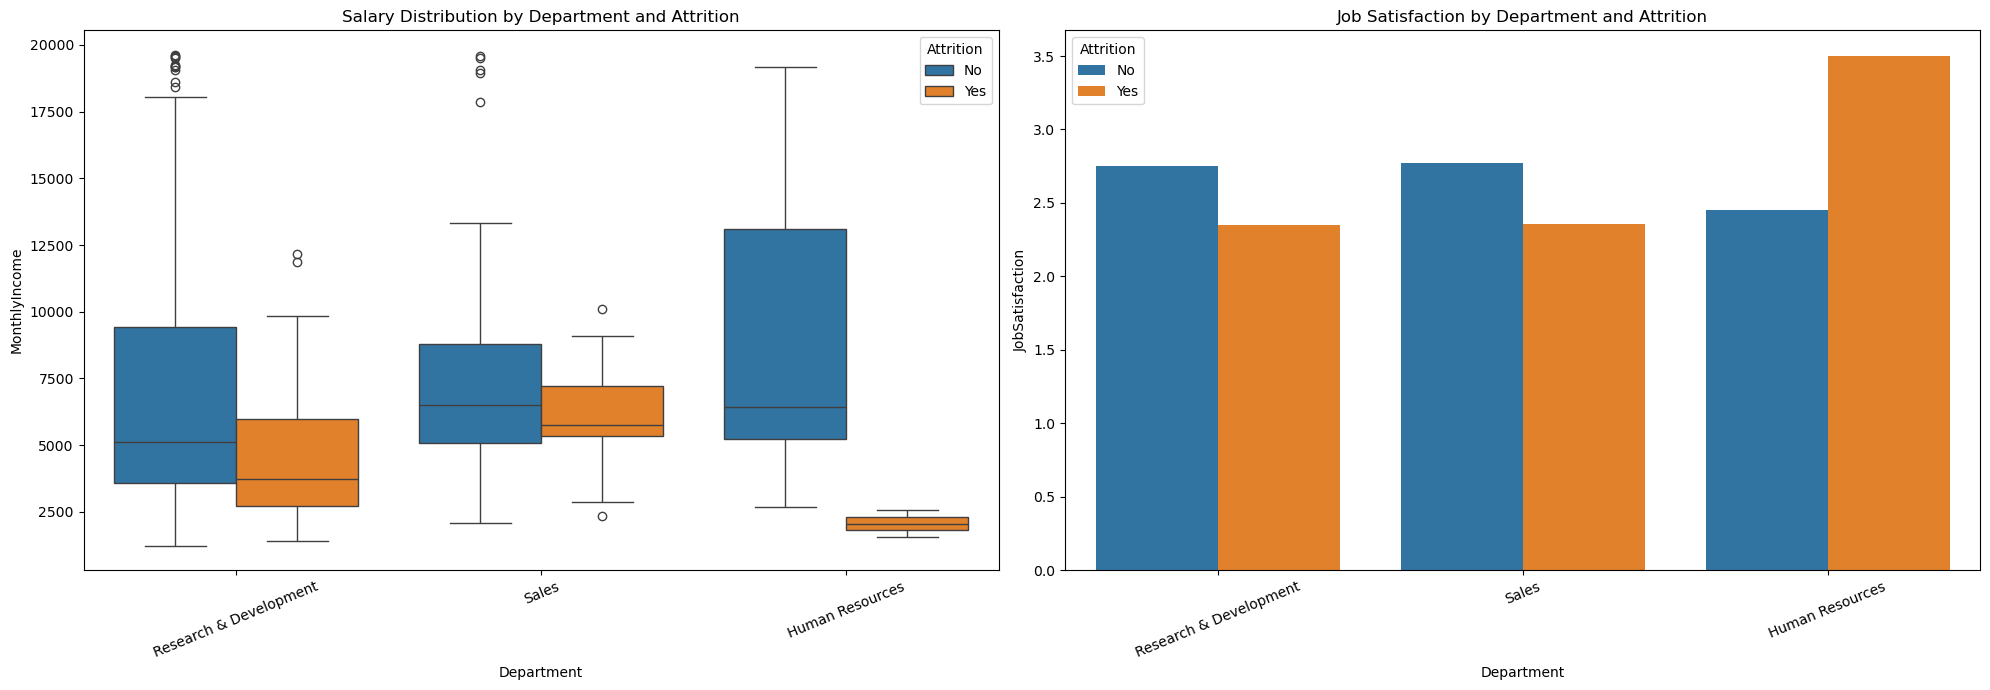

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(x='Department', y='MonthlyIncome', hue='Attrition', data=df, ax=axes[0])
axes[0].set_title('Salary Distribution by Department and Attrition')
axes[0].tick_params(axis='x', rotation=22.5)


sns.barplot(x='Department', y='JobSatisfaction', hue='Attrition', data=df, ci=None, ax=axes[1])
axes[1].set_title('Job Satisfaction by Department and Attrition')
axes[1].tick_params(axis='x', rotation=22.5)

plt.tight_layout()
plt.show()

### Question 3: What age band (s) are likely to be retained?

In [158]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [159]:
age_bins = [20, 30, 40, 50, 60]
age_bracket = ['20-30', '30-40', '40-50', '50-60']
df['age_band_retention'] = pd.cut(df['Age'], bins=age_bins, labels=age_bracket)

if 'age_band_retention' in df.columns:
    age_retention =(
        df.groupby('age_band_retention')['EmployeeTurnOver']
        .mean()
        .rename("mean_attrition_band")
    )
print(age_retention.round(2))

age_band_retention
20-30    0.23
30-40    0.14
40-50    0.11
50-60    0.13
Name: mean_attrition_band, dtype: float64


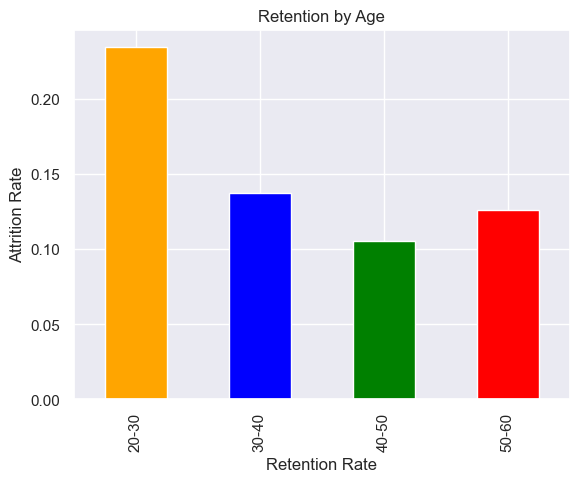

In [160]:
age_retention.plot(kind='bar', color=['orange','blue', 'green', 'red'])
plt.title('Retention by Age')
plt.xlabel('Retention Rate')
plt.ylabel('Attrition Rate')
plt.show()

### Question 4: If you were the Group Head of Indicino’s HR, what would you do differently?

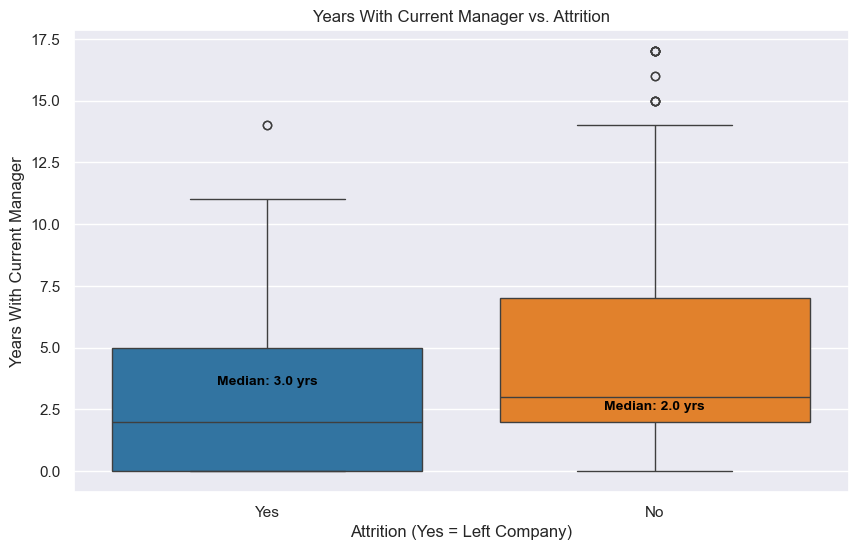

In [161]:
# First step: visualize the relationships between manager years in office and it's affect on attrition. 

sns.set(style='darkgrid')

if 'Attrition' in df.columns and 'YearsWithCurrManager' in df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, palette='tab10')
    plt.title('Years With Current Manager vs. Attrition')
    plt.xlabel('Attrition (Yes = Left Company)')
    plt.ylabel('Years With Current Manager')

    medians = df.groupby('Attrition')['YearsWithCurrManager'].median()
    for tick, label in enumerate(ax.get_xticklabels()):
        ax.text(
            tick, 
            medians[tick] + 0.5,
            f"Median: {medians[tick]:.1f} yrs", 
            horizontalalignment='center', 
            size='small', 
            color='black', 
            weight='semibold'
        )

    plt.show()
else:
    print('Columns not found')

In [162]:
# Second step: Highkight and visualize footsteps identified to tackle attrition in Indicino Company:
# 1: Identify attrition by department
attrition_by_role = df.groupby('Department')['EmployeeTurnOver'].mean().sort_values(ascending=False)

print(" Attrition Rate by Job Role (%):")
print((attrition_by_role * 100).round(2))

 Attrition Rate by Job Role (%):
Department
Sales                     20.63
Human Resources           19.05
Research & Development    13.84
Name: EmployeeTurnOver, dtype: float64


In [167]:
#2: Identify attrition by individual role:

high_risk_threshold = 0.30

high_risk_roles = df[df['AttritionProbability'] > high_risk_threshold]['Department'].unique().tolist()

print("\nHigh-Risk Roles (Attrition Probability > 30%):")
if high_risk_roles:
    for i, role in enumerate(high_risk_roles, 1):
        print(f"{i}. {role}")
else:
    print("No roles exceed the 30% attrition threshold")


High-Risk Roles (Attrition Probability > 30%):
1. Research & Development
2. Human Resources
3. Sales


In [173]:
#3: Determine how many individual employees are going to leave the company if apprepriate measures are not taken: 

df['Flag_HighRiskRole'] = df['Department'].isin(high_risk_roles)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,age_band_retention,AttritionProbability,Flag_HighRiskRole
0,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,1,3,10,9,8,8,0,20-30,0.62,True
1,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,6,3,0,0,0,0,0,20-30,0.17,True
2,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,2,2,2,2,2,1,0,40-50,0.01,True
3,33,No,Travel_Rarely,924,Research & Development,2,3,Medical,1,39,...,3,3,1,1,0,0,0,30-40,0.03,True
4,30,No,Travel_Rarely,125,Research & Development,9,2,Medical,1,41,...,5,3,10,0,1,8,0,20-30,0.02,True


In [175]:
print("Attrition in high-risk roles:")
print(flagged_employees['EmployeeTurnOver'].value_counts())

attrition_rate = flagged_employees['EmployeeTurnOver'].mean() * 100
print(f"Attrition rate in high-risk roles: {attrition_rate:.1f}%")

Attrition in high-risk roles:
EmployeeTurnOver
0    255
1     39
Name: count, dtype: int64
Attrition rate in high-risk roles: 13.3%


In [182]:
if 'Flag_HighRiskRole' in df.columns:
    flagged_employees = df[df['Flag_HighRiskRole']].copy()
    
    print("\nEmployees in High-Risk Roles:")

    
    if not flagged_employees.empty:
        display_cols = ['EmployeeNumber', 'Department', 'EmployerTurnOver', 'Flag_HighRiskRole']
        display_cols = [col for col in display_cols if col in df.columns]
        
        print(flagged_employees[display_cols].head(10).to_string(index=False))
        print(f"\nTotal high-risk employees: {len(flagged_employees)}")
        
        if 'EmployerTurnOver' in df.columns:
            attrition_rate = flagged_employees['EmployerTurnOver'].mean() * 100
            print(f"Attrition rate in high-risk roles: {attrition_rate:.1f}%")
    else:
        print("No employees found in high-risk roles.")
else:
    print("Warning: Failed to create high-risk role flag column.")


Employees in High-Risk Roles:
 EmployeeNumber             Department  Flag_HighRiskRole
             20 Research & Development               True
             30 Research & Development               True
             38                  Sales               True
             39 Research & Development               True
             41 Research & Development               True
             56                  Sales               True
             57 Research & Development               True
             63 Research & Development               True
             65 Research & Development               True
             74                  Sales               True

Total high-risk employees: 294


In [208]:
#4: Suggested  measures to tackle attrition in Indicino Company:

Measures_to_tackle_attrition = {
    'Sales': [
        'create a supportive and conducive work environment'
        'Assign peer mentor',
        'Offer commission stability plan/incentive',
        'Review sales target fairness'
        
    ],
    'Research & Development': [
        'Set only achieveable goals to minimize overwork',
        'Foster culture of innovation',
        'Foster culture of collaboration to enhance positive work experience',
        'Encourage worker-managment relationship to avoid felling of hostility by new employees'
    ],
    'Human Resources': [
        'Flexible scheduling',
        'Leadership shadow program to create effective job satisafaction',
        'create salary increment scheme'
    ]
}

def print_attrition_measures(measures_dict):
    """Prints department-specific attrition measures in a formatted way"""
    
    print("DEPARTMENTAL RETENSION PLANS")
    print("="*50 + "\n")
    
    for department, actions in measures_dict.items():
        print(f"► {department.upper()}")
        for i, action in enumerate(actions, 1):
            print(f"  {i}. {action}")
        print() 

print_attrition_measures(Measures_to_tackle_attrition)

DEPARTMENTAL RETENSION PLANS

► SALES
  1. create a supportive and conducive work environmentAssign peer mentor
  2. Offer commission stability plan/incentive
  3. Review sales target fairness

► RESEARCH & DEVELOPMENT
  1. Set only achieveable goals to minimize overwork
  2. Foster culture of innovation
  3. Foster culture of collaboration to enhance positive work experience
  4. Encourage worker-managment relationship to avoid felling of hostility by new employees

► HUMAN RESOURCES
  1. Flexible scheduling
  2. Leadership shadow program to create effective job satisafaction
  3. create salary increment scheme



### Question 5: Does the length of stay with the current manager have any impact on the reason(s) you have identified in 1

In [195]:
correlation = df[['EmployeeTurnOver','YearsWithCurrManager']].corr().iloc[0,1]
print(f"Correlation: {correlation:.2f}")

Correlation: -0.14


CORRELATION BETWEEN MANAGER TENURE AND ATTRITION PROBABILITY: -0.14



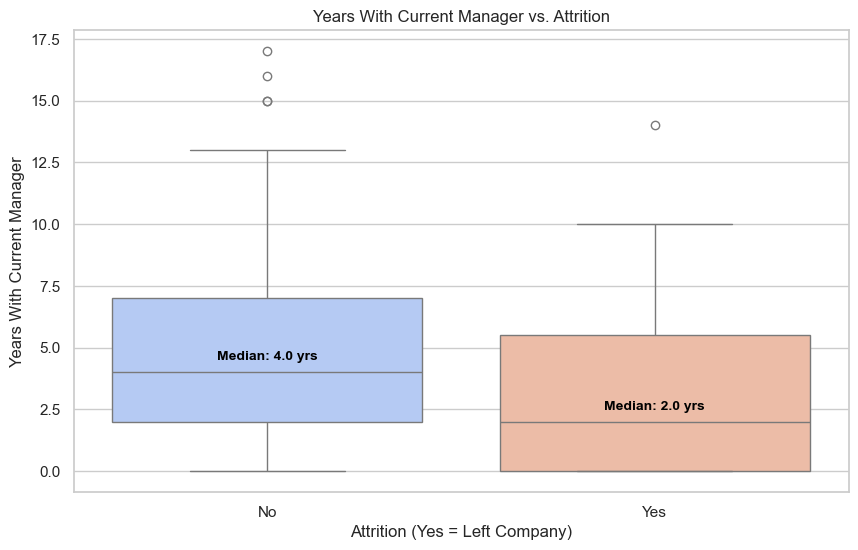

In [210]:
correlation = df[['EmployeeTurnOver','YearsWithCurrManager']].corr().iloc[0,1]

print(f"CORRELATION BETWEEN MANAGER TENURE AND ATTRITION PROBABILITY: {correlation:.2f}")
print("="*50 + "\n")

sns.set(style='whitegrid')

if 'EmployeeTurnOver' in df.columns and 'YearsWithCurrManager' in df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, palette='coolwarm')
    plt.title('Years With Current Manager vs. Attrition')
    plt.xlabel('Attrition (Yes = Left Company)')
    plt.ylabel('Years With Current Manager')

    medians = df.groupby('Attrition')['YearsWithCurrManager'].median()
    for tick, label in enumerate(ax.get_xticklabels()):
        ax.text(
            tick, 
            medians[tick] + 0.5,
            f"Median: {medians[tick]:.1f} yrs", 
            horizontalalignment='center', 
            size='small', 
            color='black', 
            weight='semibold'
        )

    plt.show()
else:
    print('Columns not found')

In [57]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check,Sales_Jobrole
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,False
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,1,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,False
